30801 peptides with intensities of 30801


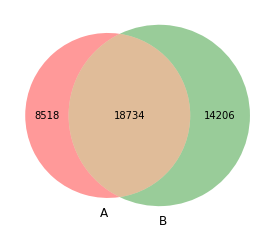

In [36]:
import pandas as pd
from matplotlib_venn import venn2
import numpy as np

raw_file = "PXD006109_HeLa2_1"
peptides_aq = pd.read_csv(f"./temp/test_temp/{raw_file}.ms_data_protein_fdr.csv")
peps_w_ints = peptides_aq[peptides_aq["int_sum"]>0]

print(f"{len(peps_w_ints.index)} peptides with intensities of {len(peptides_aq.index)}")

evidence_mq = pd.read_csv(f"./temp/evidence.txt", sep = "\t")
peptides_exp_mq = evidence_mq[evidence_mq["Experiment"] == "Shotgun_02-01_1"]
peptides_exp_mq = peptides_exp_mq[~np.isnan(peptides_exp_mq["Intensity"])]
peptides_exp_mq.to_csv("./temp/evidence_PXD006109_HeLa2_1.tsv", sep = "\t", index = None)

peptides_exp_mq = peptides_exp_mq[peptides_exp_mq['Reverse'] != "+"]
peptides_exp_mq = peptides_exp_mq[peptides_exp_mq['Potential contaminant'] != "+"]



set_seqs_mq = set(list(peptides_exp_mq["Sequence"]))
set_seqs_aq = set(peptides_aq["sequence"])

venn2([set_seqs_aq, set_seqs_mq])


,abs_delta_m_ppm,b-H2O_hits,b-NH3_hits,b_hits,charge,db_idx,decoy,decoys_cum,decoys_cum_protein,delta_m,...,target_cum,target_cum_protein,target_precursor,target_protein,total_int,x_tandem,y-H2O_hits,y-NH3_hits,y_hits,missed_cleavages
0,4.899158,0,0,3,2,4435,False,73,0,0.001187,...,29432,2492,True,True,28908543,22.998644,4,0,5,0
1,8.178741,0,0,4,2,142617,False,100,0,0.002680,...,29862,2492,True,True,47602394,23.760578,2,3,5,0
2,8.988538,1,0,2,2,194542,False,156,0,-0.002559,...,30239,2492,True,True,13073409,19.862456,0,2,5,0
3,5.734982,3,0,5,3,843348,False,15,0,-0.001563,...,27398,2492,True,True,16559126,23.655428,2,3,4,0
4,4.602397,4,1,2,2,843348,False,7,0,-0.001565,...,24645,2492,True,True,6887996,22.131922,1,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30796,8.696371,0,0,4,2,5351897,False,7,7,-0.005276,...,24939,4791,True,True,5555624,31.093906,0,0,10,0
30797,6.699124,5,1,6,2,5428613,False,0,0,0.006208,...,4097,2286,True,True,3960031,54.479805,1,3,17,0
30798,3.247581,2,0,3,3,5505247,False,48,48,0.002170,...,28748,5139,True,True,33708187,24.357063,5,0,7,2
30799,9.584627,3,0,6,4,5683090,False,1,1,-0.006963,...,19802,4369,True,True,7326179,33.640449,3,2,9,0


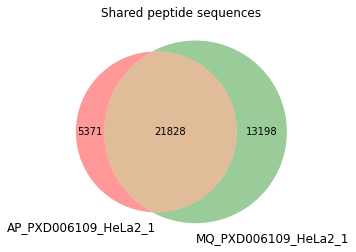

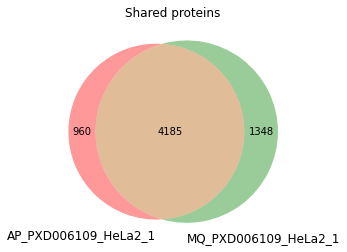

In [46]:
import test_helper

df1, df2 = test_helper.prepare_files(f"./temp/test_temp/{raw_file}.ms_data.hdf", "./temp/evidence_PXD006109_HeLa2_1.tsv")
display(df1)

test_helper.compare_populations(df1, df2, "AP_PXD006109_HeLa2_1", "MQ_PXD006109_HeLa2_1", "sequence")


test_helper.compare_populations(df1, df2, "AP_PXD006109_HeLa2_1", "MQ_PXD006109_HeLa2_1", "protein")

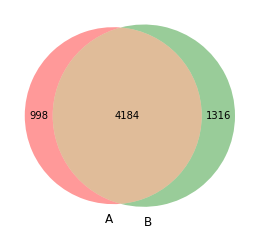

In [44]:

venn2([set(peptides_aq['protein']), set(peptides_exp_mq['Leading razor protein'])])